In [1]:
import numpy as np

class NN:
    def __init__(self, X, y, lr):
        """初始化参数"""
        self.input_layer = X
        self.W1 = np.ones((self.input_layer.shape[1], 3))  # 初始化权重全为 1
        self.W2 = np.ones((3, 1))
        self.y = y
        self.lr = lr
        
    def forward(self):
        """前向传播"""
        self.hidden_layer = sigmoid(np.dot(self.input_layer, self.W1))
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.W2))
        return self.output_layer
    
    def backward(self):
        """反向传播"""
        d_W2 = np.dot(self.hidden_layer.T, (2 * (self.output_layer - self.y) *
                                            sigmoid_derivative(np.dot(self.hidden_layer, self.W2))))

        d_W1 = np.dot(self.input_layer.T, (
            np.dot(2 * (self.output_layer - self.y) * sigmoid_derivative(
                   np.dot(self.hidden_layer, self.W2)), self.W2.T) * sigmoid_derivative(
                np.dot(self.input_layer, self.W1))))

        # 参数更新
        self.W1 -= self.lr * d_W1
        self.W2 -= self.lr * d_W2

In [2]:
import pandas as pd

# 直接运行加载数据集
df = pd.read_csv("../data/course-12-data.csv", header=0)

df.loc[df['Y'] < 0, 'Y'] = 0

# 预览前 5 行数据
df.head()

,X0,X1,Y
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


Text(0.5, 1.0, 'final loss: 0.22221850736793877')

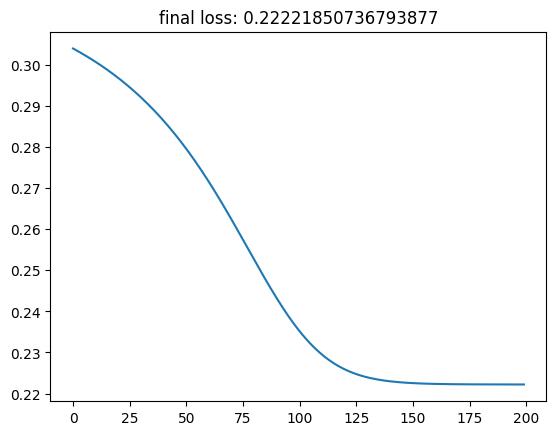

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

X = df[['X0', 'X1']].values  # 输入值
y = df[['Y']].values  # 真实 y
nn_model = NN(X, y, lr=0.001)  # 定义模型
loss_list = []  # 存放损失数值变化

def sigmoid(x):
    """激活函数"""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """sigmoid 函数求导"""
    return sigmoid(x) * (1 - sigmoid(x))

# 迭代 200 次
for _ in range(200):
    y_ = nn_model.forward()  # 前向传播
    nn_model.backward()  # 反向传播
    loss = np.square(np.subtract(y, y_)).mean()  # 计算 MSE 损失
    loss_list.append(loss)

plt.plot(loss_list)  # 绘制 loss 曲线变化图
plt.title(f"final loss: {loss}")